# Intro à Python - Projet - EMLV

## Que pense le public du retour de Karim Benzema en équipe de France ?

Un projet réalisé par Hugo Mesones, Sutharsan Murugesu, et Matthieu Mollar. Groupe DMDA ALT-2

## I. Le problème

### a) Présentation de la problématique

Nous nous plaçons ici en tant qu'agence de communication SHM Communication Consulting. Avec l'euro 2020 et le retour de Karim Benzema en équipe de France, un de nos clients nous a demandé d'analyser la popularité de Karim Benzema auprès des futurs consommateurs français. En d'autres termes, est-ce que l'image de Karim Benzema est suffisamment positive pour être utilisée dans les futures campagnes de communication.

Pour cela, nous avons décidé d'utiliser le NLP, ou le Natural Language Processing. Il s'agit d'un puissant algorithme qui permet de comprendre et de manipuler le langage humain. Cette technologie est l'une des plus utilisée en machine learning, notamment par Spotify pour analyser et classifier les musiques, pour la traduction automatique, ou encore pour la création de chatbots. La demande explose pour les professionnels qui maitrisent la construction de modèles permettant d'analyser les discours et le langage, sans passer au travers du contexte, et fournir des éclaircissements.

Dans un premier temps, nous commencerons par scraper les commentaires de vidéos sur Youtube pour réaliser un nuage de mots pour nous donner une première idée de leur opinion. Puis, nous effectuerons une analyse de sentiments pour obtenir des informations plus précises.

### b) En quoi est-elle stratégique ou utile pour un marketer ? En quoi l'utilisation des données que nous allons extraire est susceptible de nous apporter des réponses ?

Ce nuage de mots permet de retranscrire une partie de l'opinion des français à propos de Karim Benzema. Si l'intérêt de ces derniers est positif, au vu de la notoriété du joueur, M. Benzema pourrait être le joueur français propice à la campagne de communication.

L'utilisation d'un nuage de mots peut nous indiquer une tendance. Les mots clés qui en sortiront pourrons être repris dans de futures campagnes de communication.

Cette problématique est stratégique car elle est d'actualité avec l'Euro 2020. Elle peut avoir un fort impact en termes de retombées, sur le succès des campagnes et sur les revenus des entreprises. 

De plus, Karim Benzema a subi de nombreuses polémiques qui lui ont valu d'être écarté de la sélection nationale pendant de plusieurs années. Cette analyse permettra de savoir si son retour en équipe de France est bien vu par les futurs consommateurs.

## II. Les données

### a) Présentation des données que nous avons extraites et utilisées, et comment nous les avons extraites

Pour répondre à notre problématique, nous allons donc utiliser 2 vidéos sur Youtube. Il existe plusieurs bibliothèques Python pour scraper des données telles que `BeautifulSoup` ou `Ixml`. Cependant ici nous avons besoin de `Selenium` car Youtube contient du JavaScript. 

In [1]:
#pip install selenium est la commande utilisée dans Anaconda Prompt pour installer le scrapper

In [2]:
#Importation de la librairie nécessaire pour faire tourner le scrapper
from selenium import webdriver

Il faut ensuite installer le driver pour Chrome https://sites.google.com/a/chromium.org/chromedriver/downloads.
Puis, lui indiquer à quel endroit se trouver ChromeDriver, qui va nous permettre de scraper les données.

Cela va nous permettre d'envoyer un robot sur la page et simuler une navigation humaine afin de récolter des données présentes dans le code html. 

Cette technique n'est ni légale, ni illégale. Elle est dans une zone grise. Le code html est accessible à tous donc n'importe qui pourrait effectuer ces actions à la main. On utilise simplement un robot pour faire rapidement une tâche répétitive un grand nombre de fois. Cependant certains sites détectent l'utilisation d'un robot et peuvent limiter l'accès au site.

In [3]:
chromedriver_path = "C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe"

Nous lui indiquons à quel endroit trouver les vidéos qui nous intéresse. Pour avoir une idée précise de ce que pense le public de Karim Benzema, nous avons besoin de réaliser ce nuage avec un grand nombre de mots, c'est pourquoi nous avons choisi d'ajouter les commentaires des deux vidéos ci-dessous :

In [4]:
url = "https://youtu.be/x6IUoCMPj7I" # Foot Mercato : "Le retour de Karim Benzema en Équipe de France embrase la presse européenne"
url_2 = "https://www.youtube.com/watch?app=desktop&v=NcYLxT2hqX8" # Téléfoot : "Benzema fait son GRAND RETOUR chez les Bleus !"

Grâce à Selenium, nous allons pouvoir lancer un webdriver qui va simuler une visite sur l'url que nous avons spécifié juste au-dessus

In [5]:
#Scraping de la 1ere vidéo : Foot Mercato

# Nous avons déposé le fichier .txt des commentaires scrappés et nettoyés des émojis dans le pigeonnier de devoirs

driver = webdriver.Chrome(chromedriver_path)
driver.get(url)

Une fois le navigateur lancé, nous allons scroller et dérouler tous les commentaires pour que le webdriver puisse les prendre en compte. 

Ensuite, nous allons lui spécifier l'élément dans le code du site que nous souhaitons scraper grâce au language xpath, qui permet d'indiquer à Python et à Selenium tous les noeuds des attributs qui nous intéressent. Ici il s'agit de l'élément avec l'id content-text qui est spécifique aux commentaires. 

Puis nous affichons le nombre d'éléments scrapés. 

Les vidéos ont respectivement 620 et 2 906 commentaires, cependant nous avons décidé de ne pas déplier les réponses aux commentaires, à l'exception de ceux répondant aux questions posées par les chaines en commentaires : "Que pensez-vous du retour de Karim Benzema en Équipe de France ?" par Foot Mercato, et "Etes-vous satisfaits du retour de Karim Benzema en équipe de France ?" par Téléfoot.
En effet nous avons estimé que les réponses aux autres commentaires n'étaient pas suffisamment pertinentes pour notre analyse.

In [6]:
# puis nous récupérons les commentaires 
comments_reviews = driver.find_elements_by_xpath('.//*[@id="content-text"]')
print("Nombre de commentaires scrapés de la 1ère vidéo : " + str(len(comments_reviews)))

Nombre de commentaires scrapés de la 1ère vidéo : 368


In [7]:
#Scraping de la 2e vidéo : Téléfoot

driver = webdriver.Chrome(chromedriver_path)
driver.get(url_2)

In [8]:
comments_reviews_2 = driver.find_elements_by_xpath('.//*[@id="content-text"]')
print("Nombre de commentaires scrapés de la 2e vidéo : " + str(len(comments_reviews_2)))

Nombre de commentaires scrapés de la 2e vidéo : 2291


In [9]:
#On va ensuite ajouter la deuxième liste à la suite de la première grâce à la méthode extend()

comments_reviews.extend(comments_reviews_2)
print("Nombre de commentaires scrapés au total : " + str(len(comments_reviews)))

Nombre de commentaires scrapés au total : 2659


In [10]:
type(comments_reviews)

list

In [11]:
#Comme nous pouvons le voir ici, les commentaires scrapés ne sont pas encore sous forme de texte

comments_reviews

[<selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="f3e77735-d3a2-47a8-95bd-3585c87c6156")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="e8047674-59f6-4179-8964-c67f494237c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="40680ebb-d752-44bf-9509-1a53a2180a03")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="aa843c01-2054-405d-9d30-033fe85c6062")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="c207be88-cb3a-49af-b944-414a248cbb2a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="5afd0c5f-725d-4d13-98e2-2bdefcf0c83e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="59973e64f65f48731e8beb5d73cf8474", element="e9b60972-0617-4686-9bb5-99

In [12]:
# Nous allons alors convertir le résultat ci-dessus en texte. Par exemple ici avec le dernier commentaire scrapé :

comment = comments_reviews[-1]
rev = comment.text
print(rev)

Maintenant je vais commencer à soutenir l'équipe de France...
Je vraiment heureux pour le retour #KB


In [13]:
'''pour chaque élément de comments_reviews, si l'élément est plus long qu'un caractère, 
alors on ajoute cet élément sous forme de texte à la liste reviews_corpus.
'''

reviews_corpus = []

for a in comments_reviews:  
    if len(a.text) > 1: 
        #print(a.text)
        reviews_corpus.append(a.text) 

In [14]:
print("Nb de commentaires dans notre corpus :", len(reviews_corpus))

Nb de commentaires dans notre corpus : 2657


On voit ici qu'il y a 2 commentaires ne comportant qu'un seul caractère, puisque nous sommes passés à 2 657 commentaires.

Pour isoler ces commentaires nous pouvons effectuer cette commande :

In [15]:
for a in comments_reviews:  
    if len(a.text) < 2: 
        print(a.text)

1
O


Nous ne perdons pas d'information importante ici

In [16]:
print(reviews_corpus)

['Que pensez-vous du retour de Karim Benzema en Équipe de France ?', 'Meilleur chose', "Plus que mérité bien qu'un peu tard mais bon...", "L'EDF n'a pas besoin de lui", 'Très content pour lui. Avec une attaque Griezmann Benzema Mbappé on peut faire des dégâts aux équipes adversaires', 'Mérite', 'Incroyable 😍🔥🇲🇫', "Une très bonne chose pour Benzema et pour l'équipe et pour la France", ' @Jon Snow  tu connais bien le foot toi nan ?', "Il étais temps qu'il revienne en plus en trio d'attaque avec Mbappé et Griezmann😍💪", 'Je pense que Deschamps a cédée à une parti étrangère de la France', "Je pense que la France n'a pas besoin de lui pour être competitive la preuve elle a est championne du monde sans lui, et il ne faut pas oublier qu'en équipe de France benzema et nul", " @Jon Snow  Benzema est au Real depuis 10 ans , Giroud est la doublure de Werner, faut t'acheter un cerveau frere", ' @Jon Snow  ah oui carrément ! 😂 t’es vraiment dingue.', ' @Sic 58  pk', ' @Jon Snow  rageux', 'Une honte 

### b) Quelle est la qualité des données que nous avons récoltées ?

Pour le moment, les données que nous avons récoltées sont à l'état brut. Nous n'avons pas encore fait de traitement particulier et nous pouvons voir que la structure de notre corpus n'est pas très organisée. 

De nombreux utilisateurs ont utilisé des émojis, utilisé beaucoup plus de ponctuations que pour un texte normal, et que les fautes d'orthographes sont très courantes. Tout ceci complique le travail de nettoyage. 

D'autant plus que la préparation du dataset est un des aspects les plus importants pour avoir une analyse fiable, ayant le moins de résultats biaisés ou faux possibles. 

Nous ne pouvons pas encore utiliser notre corpus à l'état actuel pour effectuer notre analyse. 

### c) Les prétraitements, les nettoyages et éventuellement la création de nouvelles variables que nous avons faits

Pour améliorer la qualité des données que nous allons utiliser dans notre nuage de mots et notre analyse de sentiments, nous allons effectuer plusieurs traitements :<br />
 - Suppression des émojis (ajout de nouveaux émojis)<br />
 - Tokenisation<br />
 - Suppression des pseudos (nouvelles variables)<br />
 - Suppression des stopwords<br />
 - Suppression de "." à la fin de certains tokens (nouvelles variables)<br />
 - Filtrage de mots et de fautes d'orthographe<br />
 - Décompte de mots<br  />

#### Suppression des emojis

En affichant les commentaires, on révèle un autre problème de l'analyse de texte, c'est-à-dire la présence d'émojis. Pour les supprimer, nous allons utiliser la librairie `re` et utiliser des patterns. Il s'agit d'une librairie permettant l'utilisation d'expressions régulières. 

Ces expressions régulières permettent de représenter des modèles de chaines de caractère. On les retrouve dans plusieurs langages de programmation et nous permettent de détecter des schémas identiques dans du texte.

In [17]:
import re

In [18]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f9d0"
        u"\U0001f919"
        u"\U0001f914"
        u"\U0001f918"
        u"\U0001f92f"
        u"\U0001f937" 
        u"\u200d"
        u"\U0001f9da"
        u"\U0001f91f"                        
        u"\U0001f929"
        u"\U0001f910"
        u"'\U0001f976"
        u"'\U0001f970'"
                        
                           "]+", flags=re.UNICODE)

In [19]:
emoji_pattern

re.compile(r"[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑🧐🤙🤔🤘🤯🤷\u200d🧚🤟🤩🤐'🥶'🥰']+",
re.UNICODE)

In [20]:
cleanedemojis_reviews_corpus = [] #ici nous nettoyons le contenu scrappé des emojis

for rev in reviews_corpus:
    new_rev = emoji_pattern.sub(r'', rev)
    cleanedemojis_reviews_corpus.append(new_rev)

In [28]:
print("Nombre de commentaires dans notre corpus nettoyé des emojis : " + str(len(cleanedemojis_reviews_corpus)))

Nombre de commentaires dans notre corpus nettoyé des emojis : 2657


In [23]:
cleanedemojis_reviews_corpus

['Que pensez-vous du retour de Karim Benzema en Équipe de France ?',
 'Meilleur chose',
 'Plus que mérité bien quun peu tard mais bon...',
 'LEDF na pas besoin de lui',
 'Très content pour lui. Avec une attaque Griezmann Benzema Mbappé on peut faire des dégâts aux équipes adversaires',
 'Mérite',
 'Incroyable ',
 'Une très bonne chose pour Benzema et pour léquipe et pour la France',
 ' @Jon Snow  tu connais bien le foot toi nan ?',
 'Il étais temps quil revienne en plus en trio dattaque avec Mbappé et Griezmann',
 'Je pense que Deschamps a cédée à une parti étrangère de la France',
 'Je pense que la France na pas besoin de lui pour être competitive la preuve elle a est championne du monde sans lui, et il ne faut pas oublier quen équipe de France benzema et nul',
 ' @Jon Snow  Benzema est au Real depuis 10 ans , Giroud est la doublure de Werner, faut tacheter un cerveau frere',
 ' @Jon Snow  ah oui carrément !  t’es vraiment dingue.',
 ' @Sic 58  pk',
 ' @Jon Snow  rageux',
 'Une honte 

Cependant nous pouvons voir que tous les émojis n'ont pas été nettoyés entièrement, de nouveaux emojis étant ajoutés chaque année. Nous allons donc mettre la liste à jour en ajoutant les caractères Unicode de ces émojis :

In [25]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001F910-\U0001F976"  # nouveaux emojis                 
        u"\U0001f9d0"
        u"\U0001f92f"
        u"\u200d"
        u"\U0001f9da"
        u"\U0001f91f"                        
        u"\U0001F92D"
        u"\U0001F9A7"
        u"\U0001F98D"
        u"\U0001F92E"                   
                           "]+", flags=re.UNICODE)

In [26]:
cleanedemojis_reviews_corpus = [] #ici nous nettoyons le contenu scrappé des emojis

for rev in reviews_corpus:
    new_rev = emoji_pattern.sub(r'', rev)
    cleanedemojis_reviews_corpus.append(new_rev)

In [27]:
len(cleanedemojis_reviews_corpus)

2657

In [29]:
cleanedemojis_reviews_corpus

['Que pensez-vous du retour de Karim Benzema en Équipe de France ?',
 'Meilleur chose',
 "Plus que mérité bien qu'un peu tard mais bon...",
 "L'EDF n'a pas besoin de lui",
 'Très content pour lui. Avec une attaque Griezmann Benzema Mbappé on peut faire des dégâts aux équipes adversaires',
 'Mérite',
 'Incroyable ',
 "Une très bonne chose pour Benzema et pour l'équipe et pour la France",
 ' @Jon Snow  tu connais bien le foot toi nan ?',
 "Il étais temps qu'il revienne en plus en trio d'attaque avec Mbappé et Griezmann",
 'Je pense que Deschamps a cédée à une parti étrangère de la France',
 "Je pense que la France n'a pas besoin de lui pour être competitive la preuve elle a est championne du monde sans lui, et il ne faut pas oublier qu'en équipe de France benzema et nul",
 " @Jon Snow  Benzema est au Real depuis 10 ans , Giroud est la doublure de Werner, faut t'acheter un cerveau frere",
 ' @Jon Snow  ah oui carrément !  t’es vraiment dingue.',
 ' @Sic 58  pk',
 ' @Jon Snow  rageux',
 'U

Parfait ! Il n'y a plus d'émojis et nous n'avons pas perdu de commentaires dans le process. 

Cependant nous rencontrons un autre problème qui nuit à la qualité des données. 

Sur Youtube, nous avons la possibilité de répondre à un commentaire posté sous une vidéo. Nous pouvons également citer la personne à laquelle nous souhaitons répondre à l'aide du caractère "@". Comme nous avons déroulé les réponses des utilisateurs, ces "@" apparaissent dans certaines des réponses et viennent polluer les résultats, car ils sont accompagnés des pseudos des utilisateurs. 

Nous n'allons pas le traiter tout de suite mais c'est ce que nous allons voir par la suite.

Avant ça, nous allons sauvegarder notre corpus dans un fichier texte. Cela nous évitera d'avoir à effectuer notre scraping et de refaire les étapes ci-dessus à chaque fois.

In [30]:
with open("ProjetPython_DMDA_ALT2_KBenzema.txt", "w") as myfile :
    for l in cleanedemojis_reviews_corpus:
        textes = l.encode("utf-8")
        try :
            myfile.write(l + ","+"\n")
        except Exception as e:
            print(e)

'charmap' codec can't encode character '\u0302' in position 71: character maps to <undefined>
'charmap' codec can't encode character '\U0001f90d' in position 195: character maps to <undefined>
'charmap' codec can't encode character '\U0001f90d' in position 137: character maps to <undefined>
'charmap' codec can't encode character '\U0001f9be' in position 300: character maps to <undefined>
'charmap' codec can't encode characters in position 37-38: character maps to <undefined>
'charmap' codec can't encode character '\U0001f97a' in position 30: character maps to <undefined>
'charmap' codec can't encode character '\U0001f97a' in position 69: character maps to <undefined>
'charmap' codec can't encode characters in position 230-231: character maps to <undefined>
'charmap' codec can't encode characters in position 6-12: character maps to <undefined>
'charmap' codec can't encode character '\U0001f90d' in position 151: character maps to <undefined>
'charmap' codec can't encode character '\U0001

In [31]:
with open("ProjetPython_DMDA_ALT2_KBenzema.txt", "r") as myfile : # commande pour lire le fichier de données sauvegardées au dessus !
    cleanedemojis_reviews_corpus = myfile.readlines() 
    print(cleanedemojis_reviews_corpus)

['Que pensez-vous du retour de Karim Benzema en Équipe de France ?,\n', 'Meilleur chose,\n', "Plus que mérité bien qu'un peu tard mais bon...,\n", "L'EDF n'a pas besoin de lui,\n", 'Très content pour lui. Avec une attaque Griezmann Benzema Mbappé on peut faire des dégâts aux équipes adversaires,\n', 'Mérite,\n', 'Incroyable ,\n', "Une très bonne chose pour Benzema et pour l'équipe et pour la France,\n", ' @Jon Snow  tu connais bien le foot toi nan ?,\n', "Il étais temps qu'il revienne en plus en trio d'attaque avec Mbappé et Griezmann,\n", 'Je pense que Deschamps a cédée à une parti étrangère de la France,\n', "Je pense que la France n'a pas besoin de lui pour être competitive la preuve elle a est championne du monde sans lui, et il ne faut pas oublier qu'en équipe de France benzema et nul,\n", " @Jon Snow  Benzema est au Real depuis 10 ans , Giroud est la doublure de Werner, faut t'acheter un cerveau frere,\n", ' @Jon Snow  ah oui carrément !  t’es vraiment dingue.,\n', ' @Sic 58  pk,

#### Tokenisation

Pour réaliser notre nuage de mots nous allons maintenant procéder à la tokenisation du corpus. 

Pour cela, nous allons mettre tous les commentaires sous forme de mots uniques (tokens). Nous avons la possibilité d'utiliser la méthode `split()`, qui permet de séparer une chaine de caractère en une liste de mots distincts, cependant nous avons opté pour la fonction `word_tokenize` de `NLTK` qui nous semble être plus poussée. En effet il s'agit d'une boîte-à-outil spécialement conçue pour l'analyse de texte.

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hugo_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
#pip install nltk

In [33]:
import nltk

In [34]:
from nltk.tokenize import word_tokenize

Ici nous ne retenons que les mots de plus de 4 caractères pour avoir des résultats plus pertinents et qui ont du sens. De plus la fonction `word_tokenize` conserve la ponctuation comme un token, cela ajoute donc des mots avec uniquement un caractère spécial dans notre corpus. En ne conservant que les mots de plus de 4 caractères nous évitons ce problème. 

Ci-dessous, pour chaque commentaire dans le corpus, nous lui demandons de transformer chaque mot en un token. Ensuite, pour chaque token, et si les tokens font plus de 4 caractères, nous lui demandons d'ajouter ce token à la liste all_tokens_v2, et de passer les mots en minuscule grâce à la méthode lower().

In [35]:
all_tokens_v2 =[] 

for review in cleanedemojis_reviews_corpus: 
    mots = word_tokenize(review, "french") 
    for mot in mots: 
        if len(mot)>4:  
            all_tokens_v2.append(mot.lower())
    
print(all_tokens_v2)

['pensez-vous', 'retour', 'karim', 'benzema', 'équipe', 'france', 'meilleur', 'chose', 'mérité', "qu'un", "l'edf", 'besoin', 'content', 'attaque', 'griezmann', 'benzema', 'mbappé', 'faire', 'dégâts', 'équipes', 'adversaires', 'mérite', 'incroyable', 'bonne', 'chose', 'benzema', "l'équipe", 'france', 'connais', 'étais', 'temps', "qu'il", 'revienne', "d'attaque", 'mbappé', 'griezmann', 'pense', 'deschamps', 'cédée', 'parti', 'étrangère', 'france', 'pense', 'france', 'besoin', 'competitive', 'preuve', 'championne', 'monde', 'oublier', "qu'en", 'équipe', 'france', 'benzema', 'benzema', 'depuis', 'giroud', 'doublure', 'werner', "t'acheter", 'cerveau', 'frere', 'carrément', 'vraiment', 'dingue.', 'rageux', 'honte', 'comment', 'foutre', 'merde', 'groupe', 'marchait', "c'est", 'comme', 'était', 'sélectionné', 'bonne', 'nouvelle', 'm0nster', 'compare', 'benzema', 'celui', 'aujourd', 'image', 'benzema', 'marqué', 'pendant', 'minutes', 'cependant', 'parle', 'giroud', 'marqué', 'pendant', 'minutes

In [36]:
print("Nb de tokens nettoyés dans le corpus de reviews V2: {}".format(len(all_tokens_v2)))

Nb de tokens nettoyés dans le corpus de reviews V2: 18401


#### Suppression des pseudos

La manipulation du dessus nous a permis de nous débarasser de mots qui n'apporteront pas beaucoup de valeur à notre analyse. Ce n'est pas encore parfait mais c'est déjà mieux ! 

En effet nous remarquons que des pseudos cités dans les réponses aux commentaires se sont glissés dans les tokens. Pour résoudre ce problème et continuer à nettoyer le corpus, nous allons commencer par faire une liste des pseudos. Cela nous permettra ensuite de les supprimer parmi les tokens.

In [15]:
#Nous commençons par scraper l'élément contenant les pseudos. Pour rappel :

#from selenium import webdriver

#chromedriver_path = "C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe"

#url = "https://youtu.be/x6IUoCMPj7I" #Foot Mercato : "Le retour de Karim Benzema en Équipe de France embrase la presse européenne"
#url_2 = "https://www.youtube.com/watch?app=desktop&v=NcYLxT2hqX8" # Téléfoot : "Benzema fait son GRAND RETOUR chez les Bleus !"

#driver = webdriver.Chrome(chromedriver_path)
#driver.get(url)

In [37]:
videos_comments_pseudos = driver.find_elements_by_xpath('.//div/yt-formatted-string/a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
print(len(videos_comments_pseudos))

4663


In [38]:
driver = webdriver.Chrome(chromedriver_path)
driver.get(url) # Nous rappelons que nous avons décidé de déplier uniquement les réponses à la question posée par la chaine

In [39]:
videos_comments_pseudos_2 = driver.find_elements_by_xpath('.//div/yt-formatted-string/a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
print(len(videos_comments_pseudos_2))

331


In [40]:
videos_comments_pseudos.extend(videos_comments_pseudos_2)

In [41]:
# Malheureusement on s'aperçoit que la classe utilisée pour les pseudos sur Youtube est également utilisée pour d'autres éléments

pseudos_corpus = []

for a in videos_comments_pseudos:
    if len(a.text) > 1:
        #print(a.text)
        pseudos_corpus.append(a.text)
        
print(pseudos_corpus)

['Téléfoot', 'il y a 1 mois', 'il y a 1 mois (modifié)', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois (modifié)', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', ' @SANGOKU GUERRIER MAROCAIN ', 'il y a 1 mois', 'il y a 1 mois (modifié)', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois (modifié)', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois', 'il y a 1 mois

In [42]:
# Pour palier à ce problème, nous allons isoler les éléments de la liste comportant le caractère @

liste_pseudo = []

for v in pseudos_corpus:
    f = "@"
    if f in v:
        liste_pseudo.append(v)

print(liste_pseudo)

[' @SANGOKU GUERRIER MAROCAIN ', ' @Le Parisien Germain ', ' @WassFOOT ', ' @Beguens ', ' @Serperiel ', ' @WassFOOT ', ' @Joachim Cuault ', ' @Sekou Sacko ', ' @WassFOOT ', ' @Anissa Jertila ', ' @Melvin Nzabonimpa ', ' @Noe Tisserant ', ' @Beguens ', ' @Wolfies ', ' @Valentin de Brabandère ', ' @Lucas ', ' @DM 10 ', ' @tiago rocha ', ' @Samir Benredouane ', ' @Farid Le T ', ' @fouad douef ', ' @thomas8857 ', ' @Matteo Mariani ', ' @Iralo ', ' @MrButterfly1105 ', ' @Blainz ', ' @DM 10 ', ' @Vincent Vierin ', ' @Joachim Cuault ', ' @Goraxby ', ' @Wolfies ', ' @Ayhan Balci ', ' @SANGOKU GUERRIER MAROCAIN ', ' @DM 10 ', ' @Le Parisien Germain ', ' @David Weedrink ', ' @FixFigt ', ' @Arthur Grando ', ' @Arthur Grando ', ' @FixFigt ', ' @Bastien Chabbert ', ' @Flipa_R4xi ', ' @Arthur Grando ', ' @FixFigt ', ' @Jon Snow ', ' @Jon Snow ', ' @Jon Snow ', ' @Sic 58 ', ' @Jon Snow ', ' @M0NSTER MX73 ', ' @M0NSTER MX73 ', ' @Sergio De oliveira ', ' @Jon Snow ', ' @Nigister ', ' @Moustapha Sarr ',

In [43]:
# Puis supprimer tous les pseudos en double pour n'avoir que des valeurs distinctes

pseudos_uniques = []

for i in liste_pseudo:
    if i not in pseudos_uniques: 
        pseudos_uniques.append(i)
        
print(pseudos_uniques)

[' @SANGOKU GUERRIER MAROCAIN ', ' @Le Parisien Germain ', ' @WassFOOT ', ' @Beguens ', ' @Serperiel ', ' @Joachim Cuault ', ' @Sekou Sacko ', ' @Anissa Jertila ', ' @Melvin Nzabonimpa ', ' @Noe Tisserant ', ' @Wolfies ', ' @Valentin de Brabandère ', ' @Lucas ', ' @DM 10 ', ' @tiago rocha ', ' @Samir Benredouane ', ' @Farid Le T ', ' @fouad douef ', ' @thomas8857 ', ' @Matteo Mariani ', ' @Iralo ', ' @MrButterfly1105 ', ' @Blainz ', ' @Vincent Vierin ', ' @Goraxby ', ' @Ayhan Balci ', ' @David Weedrink ', ' @FixFigt ', ' @Arthur Grando ', ' @Bastien Chabbert ', ' @Flipa_R4xi ', ' @Jon Snow ', ' @Sic 58 ', ' @M0NSTER MX73 ', ' @Sergio De oliveira ', ' @Nigister ', ' @Moustapha Sarr ', ' @Ivan ytb ', ' @flo_nsr8 ', ' @Clement Biswane ', ' @Amal Hamza ', ' @linda tizirz ', ' @Dr Jekyll ', ' @Le Veng ', ' @Franco Malien ', ' @Anis ', ' @Ibra ', ' @Ismail Khalil ', ' @Alexis Cachoux ', ' @Eternal Sonata ']


In [44]:
# Enfin, nous allons mettre les pseudos au même format que les clés de notre futur dictionnaire

token_pseudo = []

for review in pseudos_uniques:
    mots = word_tokenize(review, "french")
    for mot in mots:
        if len(mot)>4:  #uniquement si les tokens font plus de 4 caractères
            token_pseudo.append(mot.lower()) # passage des mots en minuscule
    
print(token_pseudo)

['sangoku', 'guerrier', 'marocain', 'parisien', 'germain', 'wassfoot', 'beguens', 'serperiel', 'joachim', 'cuault', 'sekou', 'sacko', 'anissa', 'jertila', 'melvin', 'nzabonimpa', 'tisserant', 'wolfies', 'valentin', 'brabandère', 'lucas', 'tiago', 'rocha', 'samir', 'benredouane', 'farid', 'fouad', 'douef', 'thomas8857', 'matteo', 'mariani', 'iralo', 'mrbutterfly1105', 'blainz', 'vincent', 'vierin', 'goraxby', 'ayhan', 'balci', 'david', 'weedrink', 'fixfigt', 'arthur', 'grando', 'bastien', 'chabbert', 'flipa_r4xi', 'm0nster', 'sergio', 'oliveira', 'nigister', 'moustapha', 'flo_nsr8', 'clement', 'biswane', 'hamza', 'linda', 'tizirz', 'jekyll', 'franco', 'malien', 'ismail', 'khalil', 'alexis', 'cachoux', 'eternal', 'sonata']


Cette liste nous permettra de supprimer les pseudos un peu plus tard, lorsque nous serons dans la partie "Décompte des mots" et que nous aurons créé notre dictionnaire. Il y a surement plus simple mais pour le moment ça fonctionne.

#### Suppression des stopwords

Afin de donner toujours plus de sens à notre analyse et d'améliorer la qualité de nos données, nous allons chercher à supprimer les stopwords, qui sont des mots très couramment utilisés mais qui n'apportent pas de valeur ou d'informations pour notre analyse. Ils sont très fréquents et polluent le résultat : nous souhaitons donc les supprimer.

Pour cela nous allons utiliser la librairie NLTK qui fournit une liste de stopwords.

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hugo_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords

In [46]:
import string

#Voici la liste des stopwords français
print(stopwords.words('french'))
print(len(stopwords.words('french')))
print(string.punctuation) 

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [47]:
#Nous créons ici la liste qui nous permettra de les supprimer de notre corpus dans la fonction suivante
stop_list = stopwords.words('french') + list(string.punctuation)
stop_list

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [48]:
tokens_no_stop = []

for token in all_tokens_v2:
    if "'" in token:
        #print(token)
        token = token.split("'")
        #print(token)
        token =token[1]
        #print(token)
    
    if len(token)>4:
        if token not in stop_list:
            tokens_no_stop.append(token)
            
print("Nb de tokens  nettoyés dans le corpus de reviews: {}".format(len(tokens_no_stop)))

Nb de tokens  nettoyés dans le corpus de reviews: 17087


In [49]:
print(tokens_no_stop)

['pensez-vous', 'retour', 'karim', 'benzema', 'équipe', 'france', 'meilleur', 'chose', 'mérité', 'besoin', 'content', 'attaque', 'griezmann', 'benzema', 'mbappé', 'faire', 'dégâts', 'équipes', 'adversaires', 'mérite', 'incroyable', 'bonne', 'chose', 'benzema', 'équipe', 'france', 'connais', 'temps', 'revienne', 'attaque', 'mbappé', 'griezmann', 'pense', 'deschamps', 'cédée', 'parti', 'étrangère', 'france', 'pense', 'france', 'besoin', 'competitive', 'preuve', 'championne', 'monde', 'oublier', 'équipe', 'france', 'benzema', 'benzema', 'depuis', 'giroud', 'doublure', 'werner', 'acheter', 'cerveau', 'frere', 'carrément', 'vraiment', 'dingue.', 'rageux', 'honte', 'comment', 'foutre', 'merde', 'groupe', 'marchait', 'comme', 'sélectionné', 'bonne', 'nouvelle', 'm0nster', 'compare', 'benzema', 'celui', 'aujourd', 'image', 'benzema', 'marqué', 'pendant', 'minutes', 'cependant', 'parle', 'giroud', 'marqué', 'pendant', 'minutes', 'comptes', 'm0nster', 'crocodile', 'eclaté', 'sergio', 'oliveira',

In [50]:
print("Nb de tokens dans l'article 1: {}".format(len(tokens_no_stop)))

Nb de tokens dans l'article 1: 17087


#### Nettoyage supplémentaire

Nous avons donc décomposé tous les mots des commentaires en tokens. Malgré la suppression des stopwords, nous nous aperçevons que certains ont toujours une ponctuation (comme 'benzema.' ou 'euro.' par exemple). Cela va nous poser des problèmes pour faire notre dictionnaire par la suite puisque certains tokens comportant un point ne seront pas comptabilisés avec les autres alors qu'il s'agit du même mot. Nous allons donc chercher à les supprimer.

In [51]:
#pour supprimer les points à la fin de certains tokens :

tokens_sans_points = []

for e in tokens_no_stop:
    e = e.replace('.', '')
    tokens_sans_points.append(e)

print(tokens_sans_points)

['pensez-vous', 'retour', 'karim', 'benzema', 'équipe', 'france', 'meilleur', 'chose', 'mérité', 'besoin', 'content', 'attaque', 'griezmann', 'benzema', 'mbappé', 'faire', 'dégâts', 'équipes', 'adversaires', 'mérite', 'incroyable', 'bonne', 'chose', 'benzema', 'équipe', 'france', 'connais', 'temps', 'revienne', 'attaque', 'mbappé', 'griezmann', 'pense', 'deschamps', 'cédée', 'parti', 'étrangère', 'france', 'pense', 'france', 'besoin', 'competitive', 'preuve', 'championne', 'monde', 'oublier', 'équipe', 'france', 'benzema', 'benzema', 'depuis', 'giroud', 'doublure', 'werner', 'acheter', 'cerveau', 'frere', 'carrément', 'vraiment', 'dingue', 'rageux', 'honte', 'comment', 'foutre', 'merde', 'groupe', 'marchait', 'comme', 'sélectionné', 'bonne', 'nouvelle', 'm0nster', 'compare', 'benzema', 'celui', 'aujourd', 'image', 'benzema', 'marqué', 'pendant', 'minutes', 'cependant', 'parle', 'giroud', 'marqué', 'pendant', 'minutes', 'comptes', 'm0nster', 'crocodile', 'eclaté', 'sergio', 'oliveira', 

#### Décompte de mots

Nous allons maintenant calculer le nombre d'occurences de chaque tokens. Cette étape nous permettra de déterminer quels sont les mots-clés que le nuage de mots mettra en avant.

In [52]:
from collections import Counter

In [53]:
total_term_frequency_no_stop = Counter(tokens_no_stop)
total_term_frequency_no_stop

Counter({'pensez-vous': 2,
         'retour': 345,
         'karim': 212,
         'benzema': 574,
         'équipe': 346,
         'france': 422,
         'meilleur': 147,
         'chose': 24,
         'mérité': 33,
         'besoin': 32,
         'content': 134,
         'attaque': 113,
         'griezmann': 55,
         'mbappé': 57,
         'faire': 98,
         'dégâts': 2,
         'équipes': 8,
         'adversaires': 10,
         'mérite': 95,
         'incroyable': 40,
         'bonne': 79,
         'connais': 3,
         'temps': 41,
         'revienne': 10,
         'pense': 108,
         'deschamps': 137,
         'cédée': 2,
         'parti': 5,
         'étrangère': 3,
         'competitive': 1,
         'preuve': 9,
         'championne': 5,
         'monde': 169,
         'oublier': 15,
         'depuis': 47,
         'giroud': 77,
         'doublure': 1,
         'werner': 1,
         'acheter': 5,
         'cerveau': 1,
         'frere': 2,
         'carrément': 6,


In [54]:
for word, freq in total_term_frequency_no_stop.most_common(17000):
    print("{}\t{}".format(word, freq))

benzema	574
france	422
équipe	346
retour	345
karim	212
hernandez	212
place	171
monde	169
cette	165
satisfait	149
meilleur	147
deschamps	137
content	134
heureux	126
joueur	122
saison	119
attaque	113
pense	108
comme	106
faire	98
mérite	95
français	95
liste	87
quand	84
didier	84
bonne	79
giroud	77
bleus	76
merci	75
grand	71
enfin	66
dubois	62
aussi	61
maillot	61
après	60
avoir	60
jouer	59
mbappé	57
juste	57
griezmann	55
joueurs	55
maintenant	55
contre	52
dommage	52
lenglet	52
coupe	51
jamais	50
toujours	50
manque	50
sélection	48
depuis	47
vraiment	47
beaucoup	47
alors	46
mendy	46
sissoko	46
pourquoi	45
equipe	45
tellement	45
choix	45
mbappe	44
revoir	44
groupe	43
niveau	42
temps	41
incroyable	40
espère	40
meilleurs	40
meilleure	38
football	38
attaquant	38
allez	38
autre	37
super	37
nouvelle	36
gagner	36
mieux	36
encore	36
fofana	36
comment	35
sélectionné	35
évidemment	35
digne	35
trouve	34
mérité	33
question	33
besoin	32
plaisir	32
surtout	31
prendre	31
franchement	31
ferland	31
camavinga

In [55]:
most_common_tokens = total_term_frequency_no_stop.most_common(10)
print(most_common_tokens)

[('benzema', 574), ('france', 422), ('équipe', 346), ('retour', 345), ('karim', 212), ('hernandez', 212), ('place', 171), ('monde', 169), ('cette', 165), ('satisfait', 149)]


In [56]:
nb_mots = len(tokens_no_stop)
print(nb_mots)

17087


In [57]:
tfdict = {}

for w, f in total_term_frequency_no_stop.most_common(14000): 
    relative_tf= f / nb_mots
    tfdict[w]  = relative_tf

tfdict

{'benzema': 0.03359278984022941,
 'france': 0.02469713817522093,
 'équipe': 0.020249312342716687,
 'retour': 0.020190788318604786,
 'karim': 0.012407093111722362,
 'hernandez': 0.012407093111722362,
 'place': 0.010007608123134547,
 'monde': 0.00989056007491075,
 'cette': 0.009656463978463158,
 'satisfait': 0.008720079592672791,
 'meilleur': 0.008603031544448997,
 'deschamps': 0.008017791303330017,
 'content': 0.007842219230994324,
 'heureux': 0.007374027038099139,
 'joueur': 0.007139930941651548,
 'saison': 0.006964358869315854,
 'attaque': 0.006613214724644467,
 'pense': 0.006320594604084977,
 'comme': 0.006203546555861181,
 'faire': 0.005735354362965997,
 'mérite': 0.005559782290630304,
 'français': 0.005559782290630304,
 'liste': 0.00509159009773512,
 'quand': 0.004916018025399427,
 'didier': 0.004916018025399427,
 'bonne': 0.004623397904839937,
 'giroud': 0.004506349856616141,
 'bleus': 0.004447825832504243,
 'merci': 0.004389301808392345,
 'grand': 0.0041552057119447535,
 'enfin':

#### Filtrage de mots et de fautes d'orthographe

In [58]:
# Nous corrigeons ici les fautes d'orthographes et supprimons les mots qui n'apportent pas de valeur selon nous

# Nous additionnons les valeurs des deux mots (les clés du dictionnaire) pour n'en former plus qu'un :
tfdict['joueur'] = tfdict['joueur'] + tfdict['joueurs'] 
tfdict['mbappé'] = tfdict['mbappe'] + tfdict['mbappé']
tfdict['mérite'] = tfdict['mérite'] + tfdict['mérité']

del tfdict['joueurs']
del tfdict['mbappe']
del tfdict['comme']
del tfdict['faire']
del tfdict['jouer']
del tfdict['aussi']
del tfdict['benzema']
del tfdict['karim']
del tfdict['france']
del tfdict['deschamps']
del tfdict['didier']
del tfdict['cette']
del tfdict['équipe']

Comme vu précédemment, nous allons désormais supprimer les pseudos :

In [59]:
'''Initialement nous voulions effectuer la commande del tfdict[token_pseudo] pour supprimer du dictionnaire tfdict les éléments de la liste des pseudos.
Cependant, comme les dictionnaires ne sont pas ordonnés par nature il nous est impossible d'effectuer cette commande. 
Python ne peut pas prédire la clé suivante et retourne donc une erreur.
Nous avons donc choisi de créer un nouveau dictionnaire :

'''

new_dict = {k:v for k,v in tfdict.items() if k not in token_pseudo}

In [60]:
new_dict

{'retour': 0.020190788318604786,
 'hernandez': 0.012407093111722362,
 'place': 0.010007608123134547,
 'monde': 0.00989056007491075,
 'satisfait': 0.008720079592672791,
 'meilleur': 0.008603031544448997,
 'content': 0.007842219230994324,
 'heureux': 0.007374027038099139,
 'joueur': 0.010358752267805934,
 'saison': 0.006964358869315854,
 'attaque': 0.006613214724644467,
 'pense': 0.006320594604084977,
 'mérite': 0.007491075086322936,
 'français': 0.005559782290630304,
 'liste': 0.00509159009773512,
 'quand': 0.004916018025399427,
 'bonne': 0.004623397904839937,
 'giroud': 0.004506349856616141,
 'bleus': 0.004447825832504243,
 'merci': 0.004389301808392345,
 'grand': 0.0041552057119447535,
 'enfin': 0.0038625855913852637,
 'dubois': 0.003628489494937672,
 'maillot': 0.003569965470825774,
 'après': 0.003511441446713876,
 'avoir': 0.003511441446713876,
 'mbappé': 0.005910926435301691,
 'juste': 0.003335869374378182,
 'griezmann': 0.0032188213261543862,
 'maintenant': 0.0032188213261543862,


Nous voila avec un dictionnaire nettoyé, débarassé des mots communs et des pseudos qui viendraient étouffer les résultats.

# 3) Notre travail

## a) Notre démarche : approche adoptée et la ou les raisons de notre choix

Nous avons procédé de la manière suivante. Etant donné que le sujet est d’actualité et que le joueur en question est très controversé, nous nous sommes appuyés sur une vidéo youtube de Foot Mercato pour extraire les données. Cette vidéo est très explicite et regroupe une tendance générale sur le sujet. Téléfoot est une émission culte qui existe depuis des années. Foot mercato est un site internet très reconnu par les amateurs de foot, c’est pourquoi nous nous sommes dirigés rapidement vers ces chaines youtube. 

Nous avons estimé que la cible de notre client est la même que les personnes visionnant ces vidéos. Nous voulons donc savoir ce qu'ils pensent de son retour en équipe de france.

Nous avons utilisé un nuage de mots car il s'agit d'une méthode d'analyse de textes qui permet de mettre en évidence les mots-clés les plus fréquemment utilisés dans un texte. Cela permet d'analyser et de visualiser rapidement les mots-clés car ils ressortent mieux et permet à n'importe qui de pouvoir en tirer des conclusions. 

Concernant l'analyse de sentiments, il s'agit d'une méthode pour prédire l'état émotionnel de l'auteur au moment de l'écriture de son commentaire. Cette analyse permet de déterminer si la personne fait un commentaire positif, neutre ou négatif, ainsi que le ton du texte.

Cela permet également de confronter les attentes que l'on pourrait avoir sur un sujet, et la réalité. 


## b) Les outils & méthodes utilisés : nuage de points et analyse de sentiments

#### Nuage de mots

Pour réaliser le nuage de mots, nous allons utiliser la librairie `WordCloud`

In [ ]:
#pip install wordcloud

In [61]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [62]:
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 9)

Populating the interactive namespace from numpy and matplotlib


C:\Users\hugo_\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


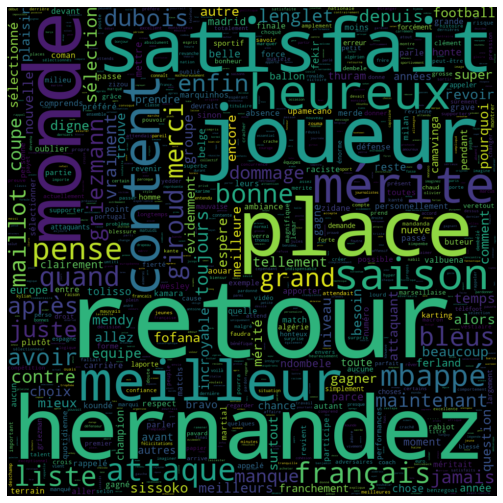

In [65]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      mode = 'RGB',
                      max_words=3000,
                      width=1000,
                      height=1000
                     ).generate_from_frequencies(new_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Les mots clés mis en valeur laissent à penser que son retour est perçu de manière positive. Nous pouvons voir les mots "satisfait", "merci", "heureux", "content", "évidemment" ou encore "mérite", ce qui est un bon point 

Le nuage de point semble positif dans l'ensemble. A première vue c'est un bon point pour lancer la campagne. 

Nous allons maintenant pousser notre analyse un peu plus loin en faisant une analyse de sentiments, et voir si cela confirme notre premier ressenti.

# Analyse de sentiments

### Analyse de sentiments par tokens

Pour réaliser notre analyse de sentiments, nous allons utiliser la librairie `TextBlob`. Pour chaque commentaire scrappé, nous aurons un indice de polarité de ce commentaire, qui nous indique s'il est positif, neutre, ou négatif. Nous allons ensuite calculer la moyenne de ces indices, ainsi que le mode.

Bien sur ces outils ne sont pas précis à 100%, mais cela nous donnera une idée de l'avis du public à propos de Karim Benzema. 

In [ ]:
#pip install textblob
#pip install textblob-fr

Initialement la librairie textblob n'est pas en français, nous devons donc ajouter la version française

In [ ]:
# Importation de la librairie Textblob
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

In [78]:
total_polarity_comments = 0

for commentaires in new_dict:
    analyse_polarite_comments = TextBlob(commentaires,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
    print(commentaires)
    print(analyse_polarite_comments)
    total_polarity_comments = total_polarity_comments + analyse_polarite_comments
    print("\n")

retour
0.0


hernandez
0.0


place
0.0


monde
0.0


satisfait
0.3


meilleur
0.53


content
0.65


heureux
0.7


joueur
0.0


saison
0.0


attaque
0.0


pense
0.0


mérite
0.0


français
0.2


liste
0.0


quand
0.0


bonne
0.7


giroud
0.0


bleus
0.04


merci
0.3


grand
0.3


enfin
0.0


dubois
0.0


maillot
0.0


après
0.0


avoir
0.0


mbappé
0.0


juste
0.22


griezmann
0.0


maintenant
0.0


contre
0.0


dommage
-0.3


lenglet
0.0


coupe
0.0


jamais
0.0


toujours
0.0


manque
0.0


sélection
0.0


depuis
0.0


vraiment
0.0


beaucoup
0.1


alors
0.0


mendy
0.0


sissoko
0.0


pourquoi
0.0


equipe
0.0


tellement
0.0


choix
0.0


revoir
0.0


groupe
0.0


niveau
0.0


temps
0.0


incroyable
0.6


espère
0.0


meilleurs
0.53


meilleure
0.53


football
0.0


attaquant
0.0


allez
0.0


autre
-0.1


super
0.7


nouvelle
0.1


gagner
0.0


mieux
0.0


encore
0.0


fofana
0.0


comment
0.0


sélectionné
0.0


évidemment
0.2


digne
0.5


trouve
0.0


mérité
0.0


question
0.0



### Analyse de sentiments par commentaire

Nous nous sommes rendus compte qu'il n'était pas forcément pertinent de faire une analyse par tokens de cette manière car les résultats ne nous semble pas correspondre. Nous allons donc prendre les commentaires en entier.

In [67]:
#Test

commentaire = "Bien sûr KBNueve c’est le Meilleur 9 de l’Equipe de France  sans débat avec Henry (pas le même profil ni carrière ...)"
TextBlob(commentaire, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]

0.1825

Ce score de polarité est calculé de -1 à 1. Si le score d'un commentaire est proche de -1, il est négatif. S'il est proche de 0 il est neutre, et s'il est proche de 1, il est positif.

In [68]:
total_polarity = 0

for commentaires in cleanedemojis_reviews_corpus:
    analyse_polarite = TextBlob(commentaires,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
    print(commentaires)
    print(analyse_polarite)
    total_polarity = total_polarity + analyse_polarite
    print("\n")

Que pensez-vous du retour de Karim Benzema en Équipe de France ?,

0.0


Meilleur chose,

0.53


Plus que mérité bien qu'un peu tard mais bon...,

0.20249999999999999


L'EDF n'a pas besoin de lui,

0.0


Très content pour lui. Avec une attaque Griezmann Benzema Mbappé on peut faire des dégâts aux équipes adversaires,

1.0


Mérite,

0.0


Incroyable ,

0.6


Une très bonne chose pour Benzema et pour l'équipe et pour la France,

1.0


 @Jon Snow  tu connais bien le foot toi nan ?,

0.0


Il étais temps qu'il revienne en plus en trio d'attaque avec Mbappé et Griezmann,

0.15


Je pense que Deschamps a cédée à une parti étrangère de la France,

-0.15000000000000002


Je pense que la France n'a pas besoin de lui pour être competitive la preuve elle a est championne du monde sans lui, et il ne faut pas oublier qu'en équipe de France benzema et nul,

-0.2


 @Jon Snow  Benzema est au Real depuis 10 ans , Giroud est la doublure de Werner, faut t'acheter un cerveau frere,

0.0


 @Jon Snow  a

Cela nous donne un résultat plus proche de la réalité.

Mais on voit bien ici les failles de cette méthode : plus la phrase est longue, plus il est difficile pour la machine de détecter correctement le sentiment de l'utilisateur.

Ou encore d'autres commentaires sont positifs mais la machine leur donne 0.0

In [69]:
print("Score total : " + str(round(total_polarity,2)))

Score total : 363.26


In [70]:
# Calcul de la moyenne

liste_polarite = []

for commentaires in cleanedemojis_reviews_corpus:
    liste_polarite.append(TextBlob(commentaires,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0])
    
print("Moyenne de polarité : " + str(mean(liste_polarite)))

Moyenne de polarité : 0.12483325615882282


In [71]:
#Nous avons arrondis les scores de polarité pour tenter d'obtenir un mode qui soit autre chose que 0, sans succès

from statistics import mode
import numpy as np

A = np.array(liste_polarite)
B = np.around(A, decimals = 2)

In [72]:
print("Mode de la polarité : " + str(mode(B)))

Mode de la polarité : 0.0


### Visualisation des résultats

Nous allons maintenant représenter les résultats sous la forme d'un graphique afin de pouvoir interpréter plus facilement les résultats. 

Tout d'abord nous allons classer les scores de polarité obtenus dans 3 catégories : Positif, Négatif, et Neutre, en utilisant les structures conditionnelles IF ELIF ELSE. 

Puis dans un second temps, nous allons réaliser notre graphique.

In [73]:
senti_list = []

for commentaires in cleanedemojis_reviews_corpus:
    polarite_sentiment = TextBlob(commentaires,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
    if (polarite_sentiment > 0):
        senti_list.append('Positif')
    elif (polarite_sentiment < 0):
        senti_list.append('Négatif')
    else:
        senti_list.append('Neutre')
        
print(senti_list)

['Neutre', 'Positif', 'Positif', 'Neutre', 'Positif', 'Neutre', 'Positif', 'Positif', 'Neutre', 'Positif', 'Négatif', 'Négatif', 'Neutre', 'Négatif', 'Neutre', 'Neutre', 'Négatif', 'Positif', 'Positif', 'Négatif', 'Négatif', 'Négatif', 'Négatif', 'Neutre', 'Négatif', 'Négatif', 'Positif', 'Négatif', 'Neutre', 'Neutre', 'Neutre', 'Négatif', 'Positif', 'Neutre', 'Neutre', 'Négatif', 'Positif', 'Positif', 'Négatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Neutre', 'Négatif', 'Neutre', 'Neutre', 'Neutre', 'Positif', 'Neutre', 'Positif', 'Neutre', 'Positif', 'Positif', 'Neutre', 'Neutre', 'Négatif', 'Positif', 'Neutre', 'Neutre', 'Neutre', 'Positif', 'Positif', 'Positif', 'Négatif', 'Positif', 'Positif', 'Neutre', 'Positif', 'Neutre', 'Positif', 'Positif', 'Neutre', 'Neutre', 'Neutre', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Négatif', 'Négatif', 'Neutre', 'Neutre', 'Négatif', 'Positif', 'Positif', 'Neutre', 'Négatif', 'Négatif', 'Neutre', 'Positif'

In [74]:
Compte = Counter(senti_list) #Nous réutilisons Counter que nous avons utilisé précédemment pour le nuage de mots
print(Compte)

Counter({'Positif': 1538, 'Neutre': 986, 'Négatif': 386})


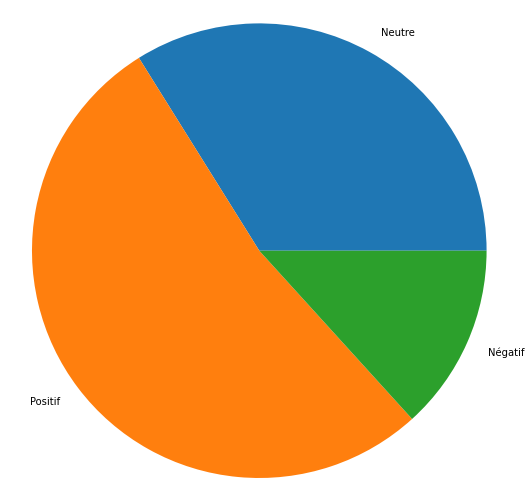

In [77]:
# Notre graphique en utilisant la librairie Matplotlib
labels = []
sizes = []

for x, y in Compte.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

Nous pouvons donc constater qu'une majorité de commentaires à l'encontre de Karim Benzema sont positifs ou neutres. Ce résultat est à nuancer puisque tous les commentaires ne sont pas correctement classés, mais dans l'ensemble cela est très positif. 

# 4. Nos résultats

## a) Interprétation des résultats obtenus

Les résultats montrent définitivement un avis plutôt positif dans l'ensemble. Que ce soit dans le nuage de mots ou l'analyse de sentiments. 

De plus, on peut constater que le fait de scrapper des avis/commentaires n’est pas représentatif de la totalité des avis. Seules les personnes les plus impliquées laissent un commentaire ou répondent aux questions posées par des chaines telles que Téléfoot ou Foot Mercato, et cela peut créer un biais dans les résultats. Tout dépend donc de la cible que l'on souhaite viser. 

En l'occurence, nous avions déterminé qu'il s'agissait de la même cible que les personnes susceptibles d'être intéressés par la campagne de notre client.

Nous recommandons de lancer la campagne publicitaire avec Karime Benzema. 

## b) Est-ce que cela répond à notre problème ? Sont-ils en ligne avec nos attentes initiales ?

Cela répond en partie à notre problème. 

Nous sommes un peu déçus car nous pensions que le nuage de mots et l'analyse de sentiments nous montreraient une tendance plus claire, plus directe. Cependant nous nous attendions à un résultat mitigé de la part des français au vu des polémiques mais l'analyse réalisée contredit cela et nous a montré qu'il y a un intérêt positif pour le joueur. Cela répond donc à notre question.

La problématique de l'analyse de texte par les machines n'est pas simple car ces dernières ne comprennent pas ce qu'est un mot ou une phrase. 

Pour obtenir de meilleurs résultats, nous pourrions donner un label à chaque phrase et associer un champ lexical précis pour chaque sentiment, ou encore établir des correspondances entre chaque mots. Notre modèle présenté dans ce projet ne prend pas cela en considération. Cela prend beaucoup de temps et de connaissances techniques mais est bien plus efficace. 

Cela permettrait de répondre à d'autres problématiques marketing : il serait possible de suivre en temps réel la satisfaction des utilisateurs pour pouvoir leur répondre le plus rapidement possible.

## c) Qu'avons-nous appris de ce projet ? Quelles ont été les principales difficultés rencontrées et comment les avez-nous dépassées ?

Nous avons appris les techniques de scrapping sur les différents réseaux et que nous pouvons également faire ressortir une tendance pour une personnalité ou un sujet sur une multitude de commentaires/avis postés par les internautes, ce qui n’est pas négligeable. Cette technique est utile pour de nombreux domaines, pas uniquement marketing mais aussi dans la recherche, dans la finance ou encore en politique. 

De même ce projet est très formateur puisqu’il rend tangible l'utilisation de Python. Nous sommes passés de la théorie à la pratique sur un sujet qui nous plait et qui est d’actualité. De plus il permet d'avoir une méthodologie claire pour la réalisation de ce type de projet.

Nous avons également appris à interpréter les différents messages d'erreurs qui pouvaient survenir, tel que les erreurs de syntaxe. Il y a également les erreurs de délimiteurs de chaine de caractère ("EOL while scanning string literal") qui s'affichent lorsque l'on a oublié de fermer correctement une chaine de caractère, ou encore les erreurs autour des types de données.

Nous avons également compris une des richesses de Python, qui est sa communauté très active. Quel que soit notre problème il y a toujours quelqu'un qui a déjà été confronté à ce problème et qui a posé sa question en ligne. Il est donc relativement aisé de trouver une réponse ou une partie de réponse à notre problème.

**Nos principales difficultés et comment nous les avons dépassées**

Une des principales difficultés que nous avons rencontré est que Python est un langage qui demande beaucoup de temps et de pratique pour réussir à le maitriser. En tant que débutants nous avons trouvé SQL (qui est utilisé pour d'autres fonctions) plus facile à comprendre et à prendre en main. 
Pour dépasser cette difficulté nous avons lu des articles et suivi des cours en ligne pour développer nos connaissances. 

Concernant les difficultés techniques que nous avons rencontrés : 

 - La présence d'émojis à nettoyer :<br  />
Nous avons utilisé les expressions régulières.<br  />
 <br  />
 - La présence des pseudos à nettoyer :<br  />
Nous avons utilisé des boucles pour repérer les éléments avec le caractère "@" et les supprimer ensuite.<br  />
<br  />
 - L'automatisation du scraping :<br  />
Nous n'avons malheureusement pas trouvé de solutions qui fonctionne.<br  />
<br  />
 - Prise en main de Jupyter Notebook, la mise en forme du code :<br  />
Nous nous sommes aidés de tutoriels en ligne.<br  />
<br  />
 - Créer nos premières boucles
 - Découverte du NLP
 - L'analyse de sentiments et les problématiques liées telles que la compréhension du contexte par la machine, la propreté de la donnée, ou encore la compréhension de l'ironie.

Merci pour votre lecture !